# Test the tfrecord and provider for ICDAR_test (latest)

In [3]:
# Transform the images and ground truth file into tfrecord
# Use slim to write the provider
# Use slim provider to load the data
import tensorflow as tf
import sys
sys.path.insert(0,'/Users/kiyoshi/Desktop/Research/LAB/FirstAccessment/2ndPaper/Textbox-Tensor/')
from datasets_test import ICDAR2013_Provider
import skimage.io as skio
import cv2
import numpy as np
#tf._version_
slim = tf.contrib.slim

file_path: /Users/kiyoshi/Desktop/Research/LAB/FirstAccessment/2ndPaper/Textbox-Tensor/datasets_test/*.tfrecord


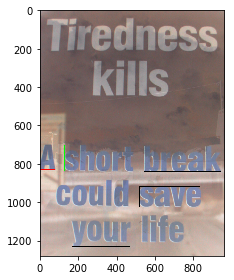

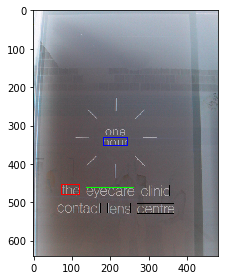

In [2]:
with tf.Graph().as_default():
    dataset = ICDAR2013_Provider.get_datasets('/Users/kiyoshi/Desktop/Research/LAB/FirstAccessment/2ndPaper/Textbox-Tensor/datasets_test/',file_pattern='*.tfrecord')

    data_provider = slim.dataset_data_provider.DatasetDataProvider(dataset, common_queue_capacity=32, common_queue_min=2)

    [image, shape, glabels, gbboxes,height,width] = \
    data_provider.get(['image', 'shape',
                    'object/label',
                    'object/bbox','height','width'])
    
    image = tf.cast(image, tf.float32) 
    bbox_image = tf.image.draw_bounding_boxes(tf.expand_dims(image,0), tf.expand_dims(gbboxes,0))
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        with slim.queues.QueueRunners(sess):
            for i in xrange(2):
                img, shape_, glabels_, bbox_,bbox_image_ = \
                sess.run([image, shape, glabels, gbboxes,bbox_image])
                skio.imshow(np.uint8(bbox_image_[0,:,:,:])*255)
                skio.show()

In [109]:
numofbox = bbox_.shape[0]
bboxes = bbox_
numofbox

1

In [110]:
img.shape

(523, 689, 3)

In [111]:
bboxes

array([[ 0.01015965,  0.77246654,  0.99709725,  0.99808794]], dtype=float32)

In [112]:
xmin = [int(i ) for i in bboxes[:,0]]
xmin

[0]

In [113]:
#numofbox = bbox_.shape[0]
#bboxes = bbox_
xmin = bboxes[:,0]
ymin = bboxes[:,1]
xmax = bboxes[:,2]
ymax = bboxes[:,3]

In [114]:
print xmin
print ymin
print xmax
print ymax

[ 0.01015965]
[ 0.77246654]
[ 0.99709725]
[ 0.99808794]


In [115]:
xmin_origin = xmin * img.shape[1]
ymin_origin = ymin * img.shape[0]
xmax_origin = xmax * img.shape[1]
ymax_origin = ymax * img.shape[0]

print xmin_origin
print ymin_origin
print xmax_origin
print ymax_origin

[ 7.]
[ 404.]
[ 687.]
[ 522.]


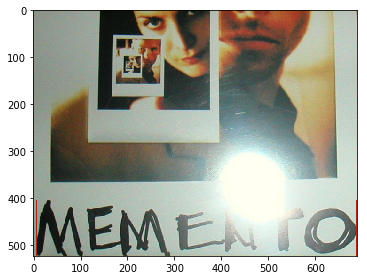

In [116]:
for i in range(numofbox):
    dst_image = cv2.rectangle(np.uint8(img),(xmin_origin[i],ymin_origin[i]),
                         (xmax_origin[i],ymax_origin[i]),(255,0,0))

skio.imshow(dst_image)
skio.show()